In [1]:
!pip install koreanize_matplotlib

!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.1 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)[['title','label']]
df.head()

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화


In [6]:
df.shape

(45678, 2)

In [7]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [8]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [9]:
df['label'].value_counts(normalize=True)

label
세계      0.182145
스포츠     0.169491
정치      0.161544
경제      0.133938
생활문화    0.125903
IT과학    0.114607
사회      0.112374
Name: proportion, dtype: float64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

In [11]:
tfidfvect = TfidfVectorizer(max_features=10000)
tfidfvect

TfidfVectorizer(max_features=10000)

In [12]:
dtm = tfidfvect.fit_transform(df['title'])
dtm

<45678x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 207106 stored elements in Compressed Sparse Row format>

In [13]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidfvect.get_feature_names_out())
df_dtm.head()

,00,01,02,03,0원,10,100,1004,100gb,100개,...,히어로즈,힐러리,힐러리트럼프,힐링,힐만,힘든,힘으로,힘은,힘찬,女배구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': '연합뉴스 TF-IDF 가중치'}>

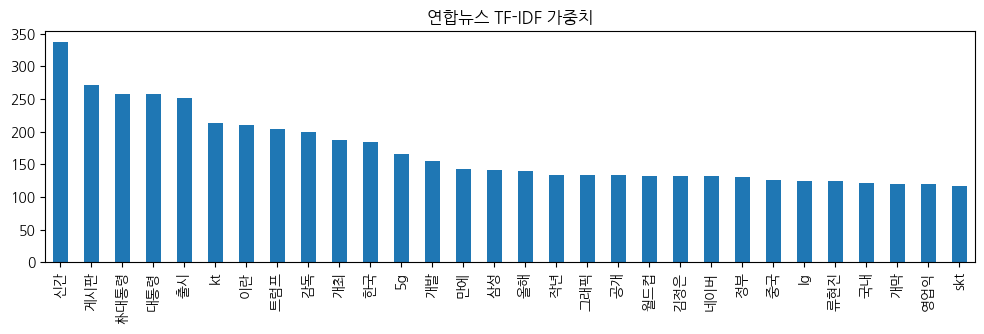

In [14]:
df_dtm.sum().nlargest(30).plot(kind="bar", figsize=(12,3), title="연합뉴스 TF-IDF 가중치")

In [26]:
LDA_model = LatentDirichletAllocation(n_components=4, random_state=42)
W = LDA_model.fit_transform(df_dtm)
W

array([[0.08040377, 0.07474909, 0.07477409, 0.77007305],
       [0.74974973, 0.08341694, 0.08341746, 0.08341587],
       [0.74081993, 0.08966096, 0.0840381 , 0.08548101],
       ...,
       [0.07890673, 0.7628409 , 0.0791791 , 0.07907327],
       [0.07386249, 0.08105695, 0.07872093, 0.76635963],
       [0.0659067 , 0.06698397, 0.06627952, 0.80082981]])

- W : 원본문서와 토픽의 조합을 표현한 행렬

In [27]:
H = LDA_model.components_
H

array([[ 0.25025838,  0.25284922,  0.25016441, ...,  0.25232415,
         2.01979199,  0.25509657],
       [ 0.25288577,  6.52513656,  4.98724351, ...,  3.84648858,
         0.27824124, 11.40975374],
       [ 0.25167211,  0.2575939 ,  0.25171887, ...,  0.25074545,
         1.28586448,  0.25157975],
       [ 7.61977392,  0.25867522,  0.25462571, ...,  0.25430069,
         0.25311729,  0.30343786]])

- H : n_components(토픽의 수)에 지정된 행의 수를 가지며, 원본 문서의 dtm 의 열과 동일한 수의 열을 가짐

In [28]:
df_lda_w = pd.DataFrame(W)
df_lda_w

,0,1,2,3
0,0.080404,0.074749,0.074774,0.770073
1,0.749750,0.083417,0.083417,0.083416
2,0.740820,0.089661,0.084038,0.085481
3,0.079859,0.367688,0.474018,0.078434
4,0.092281,0.094523,0.719789,0.093407
...,...,...,...,...
45673,0.418467,0.244299,0.271514,0.065720
45674,0.083059,0.083711,0.084370,0.748859
45675,0.078907,0.762841,0.079179,0.079073
45676,0.073862,0.081057,0.078721,0.766360


In [19]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [29]:
df_lda_w['title'] = df['title']
df_lda_w['label'] = df['label']
df_lda_w.head(15).style.background_gradient(axis=1)

,0,1,2,3,title,label
0,0.080404,0.074749,0.074774,0.770073,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.749750,0.083417,0.083417,0.083416,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.740820,0.089661,0.084038,0.085481,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.079859,0.367688,0.474018,0.078434,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.092281,0.094523,0.719789,0.093407,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.740109,0.086521,0.088018,0.085353,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.092308,0.721797,0.093258,0.092637,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.688210,0.104093,0.103849,0.103848,미세먼지 속 출근길,생활문화
8,0.508610,0.095217,0.095259,0.300914,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.281955,0.068602,0.359064,0.290379,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


In [30]:
df_lda_topic = pd.DataFrame(H, columns=tfidfvect.get_feature_names_out())
df_lda_topic

,00,01,02,03,0원,10,100,1004,100gb,100개,...,히어로즈,힐러리,힐러리트럼프,힐링,힐만,힘든,힘으로,힘은,힘찬,女배구
0,0.250258,0.252849,0.250164,0.250173,3.776987,22.964080,4.713724,3.270361,2.673886,0.262612,...,0.253662,0.688217,0.251897,0.255538,0.250766,0.252917,0.255196,0.252324,2.019792,0.255097
1,0.252886,6.525137,4.987244,5.474805,0.258325,7.409215,3.888970,0.250150,0.250135,0.253478,...,2.562597,17.623393,0.252237,3.856348,5.077844,0.262424,0.250819,3.846489,0.278241,11.409754
2,0.251672,0.257594,0.251719,0.255903,0.610731,8.923377,9.743113,0.250154,0.250860,3.286097,...,0.252812,14.072202,0.252020,0.250219,0.253122,0.253951,3.874850,0.250745,1.285864,0.251580
3,7.619774,0.258675,0.254626,0.251199,0.260483,9.444741,0.256280,0.250147,0.251222,0.254556,...,4.548382,12.502649,7.081619,0.252351,4.355415,4.407188,1.876453,0.254301,0.253117,0.303438


In [23]:
# 5번 topic을 기준으로 상위 키워드

df_lda_topic.loc[5].nlargest(30)

코스피      94.897386
프로농구     92.711523
꺾고       81.675261
朴대통령     78.967245
nba      67.806662
감독       60.554070
하락       54.113179
승리       52.541105
상승       52.520699
만에       47.055248
1위       46.919671
sk       41.120919
내년       40.947432
선두       40.165561
올해       39.942623
역대       38.786184
여자농구     38.177642
환율       38.160085
원달러      37.632636
출발       37.276396
현대모비스    35.059542
2위       34.493335
전망       34.295205
다시       32.412543
삼성       32.412294
db       31.527746
성공       31.344870
현대캐피탈    31.218443
사상       30.884444
외국인      30.370571
Name: 5, dtype: float64

In [31]:
def plot_top_words(model, feature_names, n_top_words, title, n_topics=5):
  df_topic = pd.DataFrame(model.components_, columns = feature_names)

  fig,axes = plt.subplots(1, n_topics, figsize = (6 * n_topics, 15), sharex=True)
  axes = axes.flatten()

  for topic_idx in df_lda_topic.index:
    ax = axes[topic_idx]
    df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
    ax.invert_yaxis()
    ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":20})
    ax.tick_params(axis="both", which="major", labelsize=15)
    for i in "top right".split():
      ax.spines[i].set_visible(False)

    fig.suptitle(title, fontsize=30)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

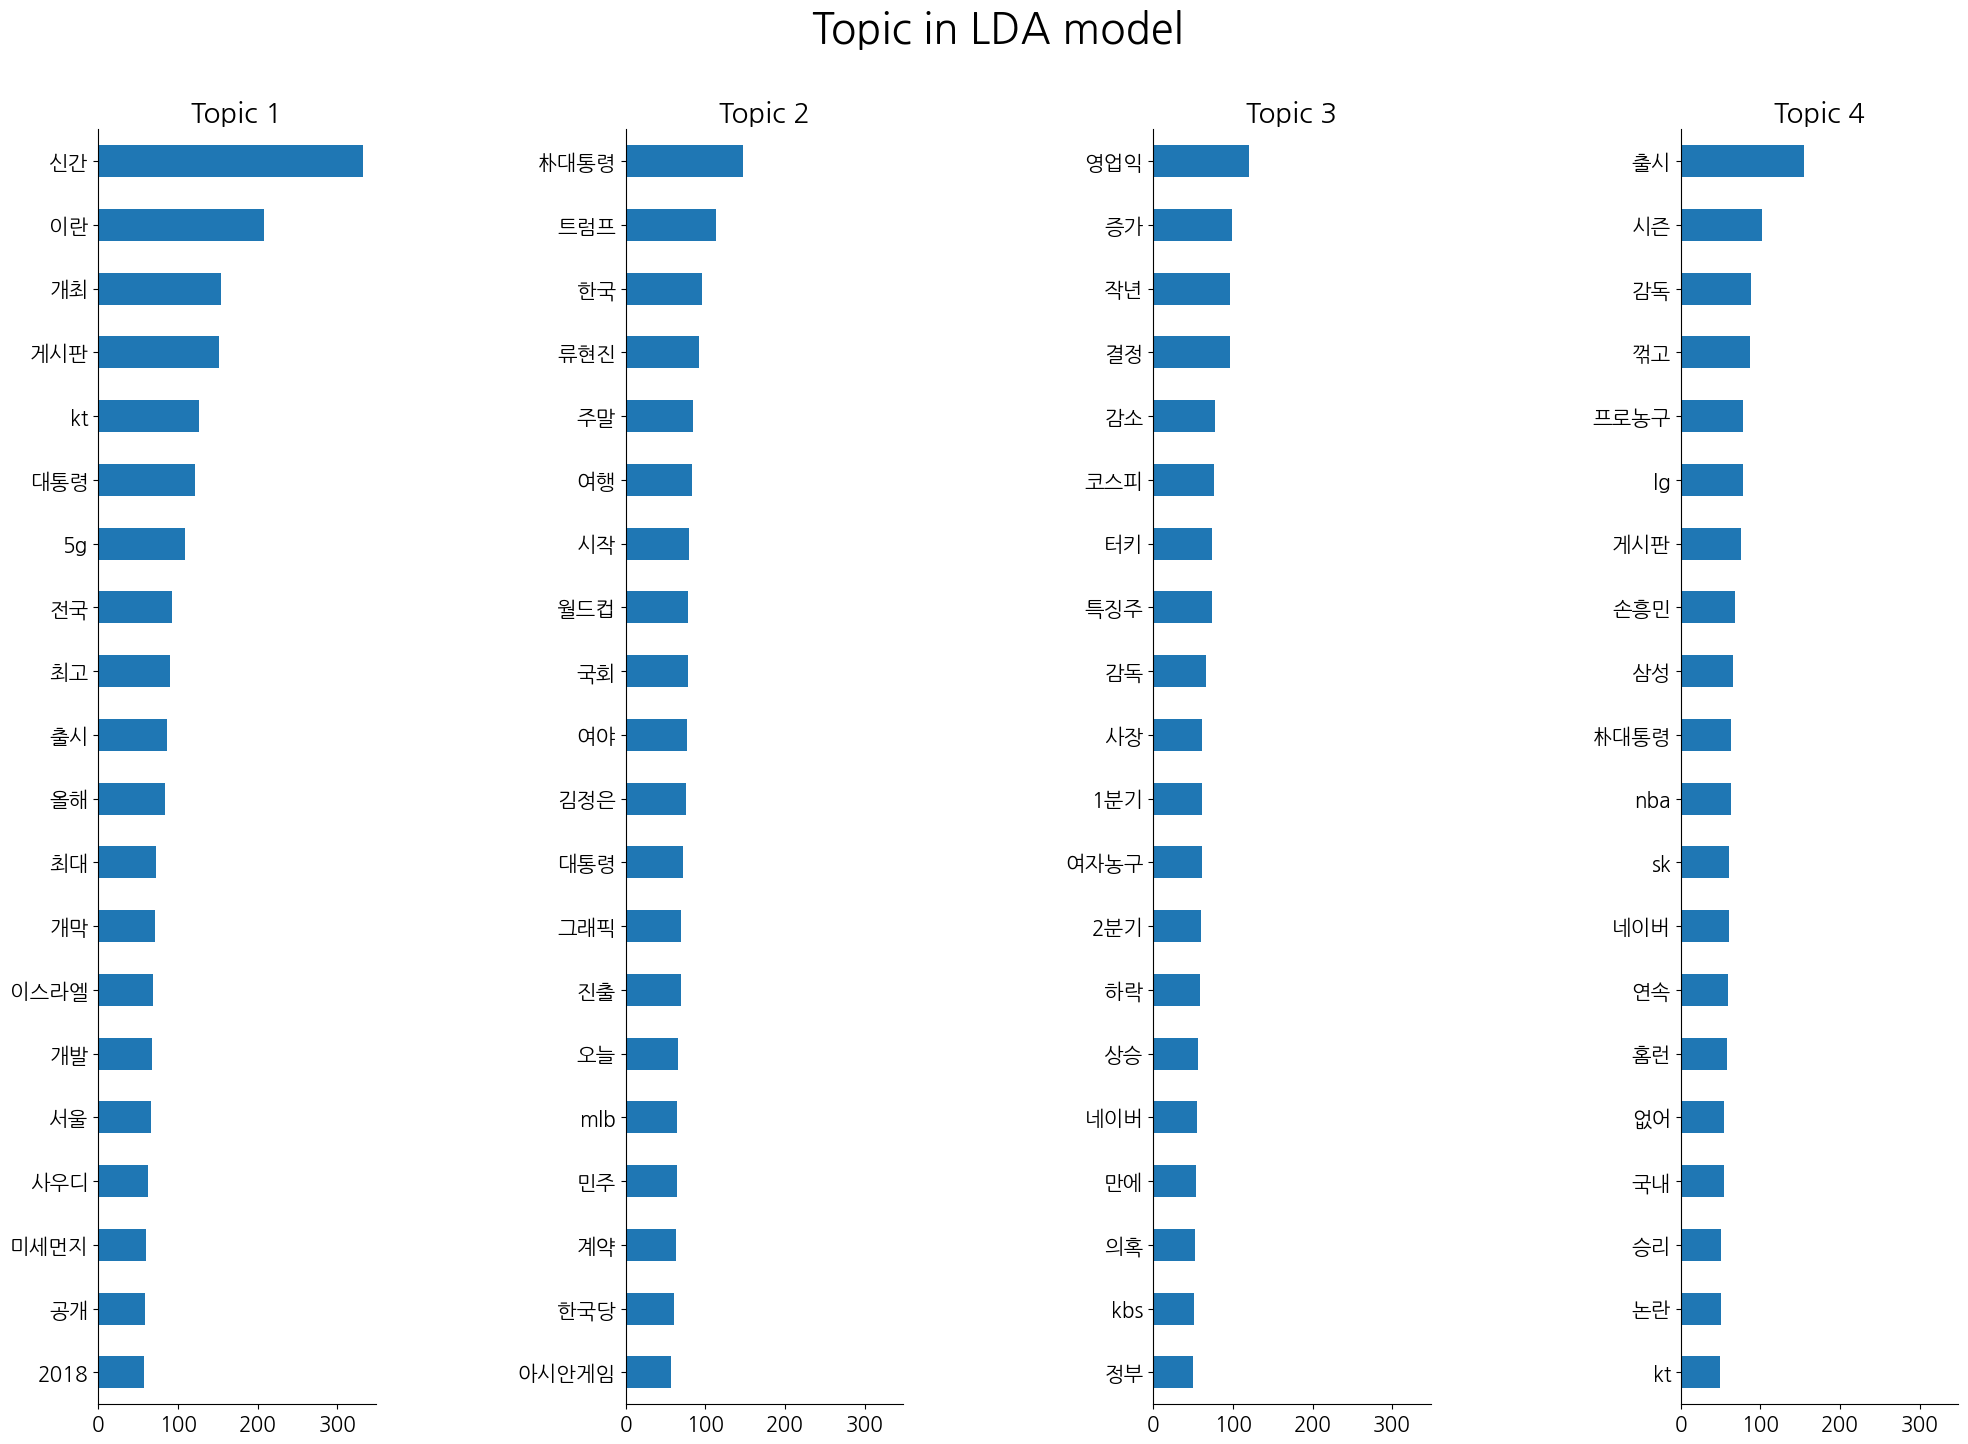

In [32]:
n_top_words = 20
plot_top_words(LDA_model, tfidfvect.get_feature_names_out(), n_top_words, "Topic in LDA model", n_topics=4)